# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [69]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [70]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [71]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [72]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [73]:
fraud.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

<Axes: xlabel='fraud'>

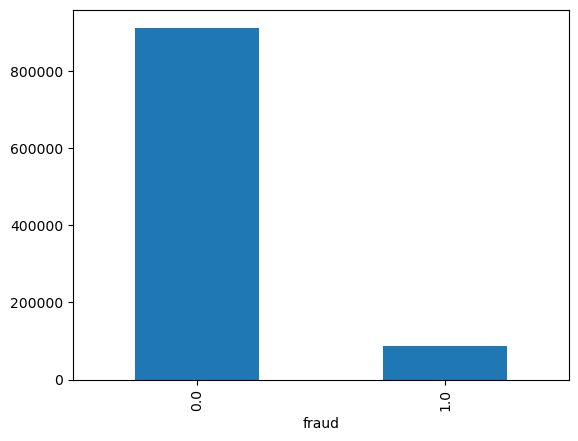

In [74]:
fraud_yes = fraud["fraud"].value_counts()
fraud_yes.plot(kind="bar")

In [75]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [76]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
log_reg = LogisticRegression()

In [78]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [79]:
log_reg.score(X_test_scaled, y_test)

0.95932

In [80]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228504
         1.0       0.89      0.60      0.72     21496

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



#### Oversampling

In [81]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [82]:
train["fraud"] = y_train.values

In [83]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [84]:
yes_diabetes_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [85]:
train_over = pd.concat([yes_diabetes_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
495691,-0.380494,-0.147026,1.045134,-2.723632,-0.734408,-0.334576,0.732987,1.0
485315,-0.310744,-0.183328,0.958266,0.367157,1.361641,-0.334576,0.732987,1.0
522494,-0.372260,-0.164039,1.166617,0.367157,1.361641,-0.334576,0.732987,1.0
242750,-0.234795,-0.120080,6.951016,0.367157,1.361641,-0.334576,0.732987,1.0
478335,-0.221516,-0.131420,0.814449,0.367157,-0.734408,-0.334576,0.732987,1.0
...,...,...,...,...,...,...,...,...
749995,-0.341506,-0.168750,-0.304919,0.367157,-0.734408,-0.334576,0.732987,0.0
749996,-0.365051,-0.152429,-0.538908,0.367157,-0.734408,-0.334576,0.732987,0.0
749997,-0.261360,0.320323,0.160838,0.367157,-0.734408,-0.334576,0.732987,0.0
749998,-0.322909,-0.185101,-0.196561,0.367157,-0.734408,-0.334576,0.732987,0.0


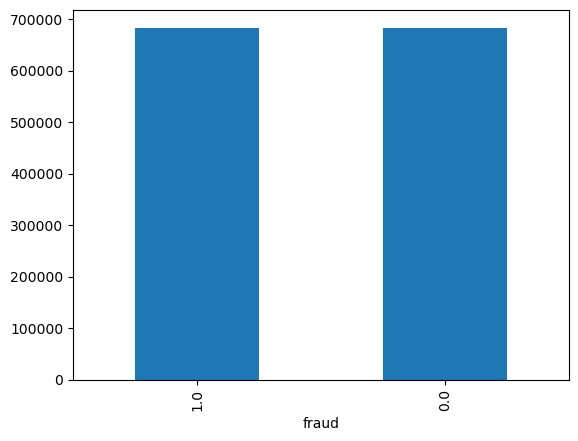

In [86]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [87]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [88]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [89]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228504
         1.0       0.57      0.95      0.71     21496

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



#### Undersampling

In [90]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.302335,-0.180880,0.205419,0.367157,-0.734408,-0.334576,0.732987,0.0
1,1.232543,-0.180908,-0.275739,0.367157,-0.734408,2.988854,0.732987,0.0
2,-0.073617,-0.175932,-0.044907,0.367157,-0.734408,-0.334576,0.732987,0.0
3,-0.340400,-0.071676,1.535765,0.367157,-0.734408,-0.334576,0.732987,1.0
4,0.575570,-0.169013,0.046002,0.367157,1.361641,-0.334576,0.732987,0.0
...,...,...,...,...,...,...,...,...
749995,-0.341506,-0.168750,-0.304919,0.367157,-0.734408,-0.334576,0.732987,0.0
749996,-0.365051,-0.152429,-0.538908,0.367157,-0.734408,-0.334576,0.732987,0.0
749997,-0.261360,0.320323,0.160838,0.367157,-0.734408,-0.334576,0.732987,0.0
749998,-0.322909,-0.185101,-0.196561,0.367157,-0.734408,-0.334576,0.732987,0.0


In [92]:
no_fraud_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
6787,0.272743,-0.177135,1.129253,0.367157,-0.734408,-0.334576,-1.364281,0.0
578093,0.102057,0.028898,-0.299541,0.367157,1.361641,-0.334576,0.732987,0.0
176180,0.009345,-0.158744,0.429955,0.367157,1.361641,-0.334576,-1.364281,0.0
251418,-0.274595,-0.176179,0.564990,0.367157,1.361641,-0.334576,0.732987,0.0
674531,0.793523,-0.171615,-0.535144,0.367157,-0.734408,-0.334576,-1.364281,0.0
...,...,...,...,...,...,...,...,...
340697,-0.374872,-0.159267,-0.050296,0.367157,-0.734408,-0.334576,0.732987,0.0
143827,-0.404947,-0.143760,0.329091,-2.723632,-0.734408,-0.334576,0.732987,0.0
423955,-0.103842,-0.170118,-0.458383,0.367157,-0.734408,-0.334576,0.732987,0.0
477089,-0.392372,-0.141898,-0.081564,-2.723632,1.361641,2.988854,0.732987,0.0


In [93]:
train_under = pd.concat([no_fraud_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
6787,0.272743,-0.177135,1.129253,0.367157,-0.734408,-0.334576,-1.364281,0.0
578093,0.102057,0.028898,-0.299541,0.367157,1.361641,-0.334576,0.732987,0.0
176180,0.009345,-0.158744,0.429955,0.367157,1.361641,-0.334576,-1.364281,0.0
251418,-0.274595,-0.176179,0.564990,0.367157,1.361641,-0.334576,0.732987,0.0
674531,0.793523,-0.171615,-0.535144,0.367157,-0.734408,-0.334576,-1.364281,0.0
...,...,...,...,...,...,...,...,...
749919,0.110793,-0.181909,2.149601,0.367157,-0.734408,-0.334576,0.732987,1.0
749923,-0.331944,-0.141203,0.812831,0.367157,-0.734408,-0.334576,0.732987,1.0
749957,0.073109,-0.176182,1.726682,0.367157,-0.734408,-0.334576,0.732987,1.0
749958,-0.365031,-0.179308,1.030607,0.367157,-0.734408,-0.334576,0.732987,1.0


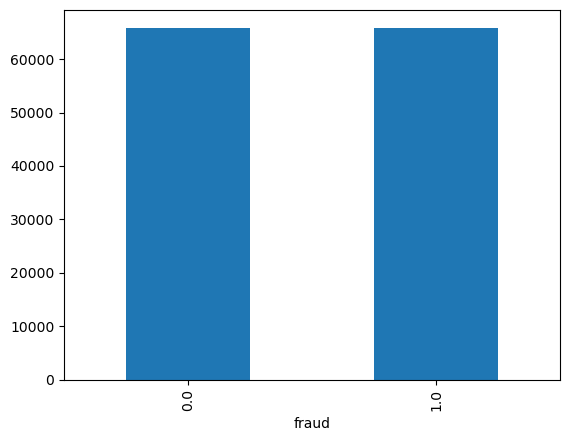

In [94]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [95]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [96]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [97]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228504
         1.0       0.57      0.95      0.71     21496

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



SMOTE

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [100]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [101]:
y_train_sm.value_counts()

fraud
0.0    684093
1.0    684093
Name: count, dtype: int64

In [102]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [103]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228504
         1.0       0.57      0.95      0.71     21496

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



Threshold Adjustment in Classification Models


In [104]:
adjusted_pred = [1 if tup[1] > 0.30 else 0 for tup in log_reg.predict_proba(X_test_scaled)]

In [105]:
print(classification_report(y_pred = adjusted_pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94    228504
         1.0       0.44      0.98      0.61     21496

    accuracy                           0.89    250000
   macro avg       0.72      0.93      0.77    250000
weighted avg       0.95      0.89      0.91    250000

